#### Implementation of InceptionResNetV2 for classification of skin lesions using the MNIST-HAM10000 Dataset.
- Date : January 30th 2024
- Author : Aarya Bhave
- Project : Skin_Cancer_Diagnosis
  
This code carries out preprocessing on the metadata for classification of seven types of skin lesions.  
Before running this file locally, you must have Tensorflow-GPU installed with a dedicated GPU.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [3]:
meta_data = pd.read_csv('HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


##### Basic Description

In [4]:
meta_data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


##### Train-Test-Split

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(meta_data, meta_data[['dx']]):
    strat_train_split = meta_data.loc[train_indices]
    strat_test_split = meta_data.loc[test_indices]

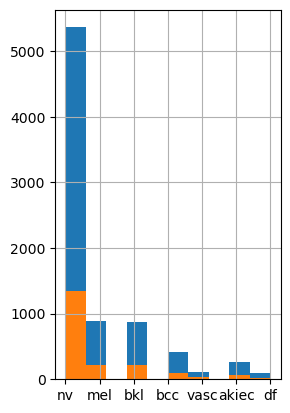

In [11]:
plt.subplot(1, 2, 1)
strat_train_split['dx'].hist()
strat_test_split['dx'].hist()
plt.show()

In [12]:
strat_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8012 entries, 7946 to 221
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     8012 non-null   object 
 1   image_id      8012 non-null   object 
 2   dx            8012 non-null   object 
 3   dx_type       8012 non-null   object 
 4   age           7967 non-null   float64
 5   sex           8012 non-null   object 
 6   localization  8012 non-null   object 
dtypes: float64(1), object(6)
memory usage: 500.8+ KB


In [13]:
strat_test_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2003 entries, 4891 to 2811
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     2003 non-null   object 
 1   image_id      2003 non-null   object 
 2   dx            2003 non-null   object 
 3   dx_type       2003 non-null   object 
 4   age           1991 non-null   float64
 5   sex           2003 non-null   object 
 6   localization  2003 non-null   object 
dtypes: float64(1), object(6)
memory usage: 125.2+ KB


##### **Preprocessing Pipeline**
- Age Imputation
-

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        